# Sea ice forecasting using the IceNet library

{bdg-primary}`Polar`
{bdg-secondary}`Modelling`
{bdg-warning}`Standard`
{bdg-info}`Python`

<p align="left">
    <a href="https://github.com/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/blob/main/LICENSE">
        <img alt="license" src="https://img.shields.io/badge/license-MIT-yellow.svg">
    </a>
    <a href="https://github.com/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/actions/workflows/render.yaml">
        <img alt="render" src="https://github.com/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/actions/workflows/render.yaml/badge.svg">
    </a>
    <a href="https://github.com/alan-turing-institute/environmental-ds-book/issues/239">
        <img alt="review" src="https://img.shields.io/badge/view-review-purple">
    </a>
    <br/>
</p>

<p align="left">
    <a href="http://mybinder.org/v2/gh/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://mybinder.org/badge_logo.svg">
    </a>
    <a href="https://replay.notebooks.egi.eu/v2/gh/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://img.shields.io/badge/launch-EGI%20binder-F5A252.svg?logo=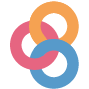">
    </a>
    <br/>
</p>

<p align="left">
    <a href="https://w3id.org/ro-id/c9df67a3-0d77-4029-8556-e62fcc95a35b">
        <img alt="rohub" src="https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue">
    </a>
    <a href="https://zenodo.org/badge/latestdoi/777128102">
        <img alt="doi" src="https://zenodo.org/badge/777128102.svg">
    </a>
</p>

## Context
### Purpose
This notebook demonstrates the use of the [IceNet library](https://pypi.org/project/icenet/) for sea-ice forecasting trained using climate reanalysis and observational data.

### Description
[IceNet](https://github.com/icenet-ai/icenet/) is a Python library that provides the ability to download, process, train and predict from end to end. Users can interact with IceNet either via the Python interface or via a set of command-line interfaces (CLI) which provide a high-level interface that covers the above abilities.

This notebook demonstrates the use of the Python library api for forecasting sea ice for a reduced dataset to demonstrate its capabilities. The final outputs of interest are maps of sea ice concentration.

### Modelling approach
IceNet is a probabilistic, deep learning sea ice forecasting system. It utilises ensemble modelling of [U-Net](https://link.springer.com/chapter/10.1007/978-3-319-24574-4_28) networks to generate daily forecasts of sea ice conditions, trained on climate reanalysis and sea ice observational data (the built-in downloaders within IceNet are extensible). The original IceNet research model, published in Nature Communications ([Seasonal Arctic sea ice forecasting with probabilistic deep learning](https://www.nature.com/articles/s41467-021-25257-4)) was trained on climate simulations and observational data to forecast the next 6 months of monthly-averaged sea ice concentration maps.

The Python library ([IceNet](https://github.com/icenet-ai/icenet/)) showcased in this notebook is a heavily refactored version of the original research code from the original publication that has been developed for operational forecasting that utilises daily inputs and is able to generate daily forecast outputs for a variable forecast time period. The core U-Net architecture is implemented using Tensorflow, however, the library architecture allows other backend libraries to be utilised and wrapped around the IceNet library ecosystem.

### Highlights
 * [1. Setup](##-1.-Setup) the environment and project structure.
 * [2. Download](##-2.-Download) sea ice concentration data as training data.
 * [3. Process](##-3.-Process) downloaded data, and generate cached datasets to speed up training.
 * [4. Train](##-4.-Train) the neural network and generate checkpoint and model output.
 * [5. Predict](##-5.-Predict) for defined dates.
 * [6. Visualisation](##-6.-Visualisation) of the prediction output.

### Compatible platforms
The `IceNet` library is designed to be run within a Unix environment, and, as such, this notebook has been tested on the following OS platforms:
* Linux
* macOS (Intel and Apple Silicon)

Windows: although [WSL2](https://learn.microsoft.com/en-us/windows/wsl/install) should work, it is untested and is not a supported platform.

In terms of hardware, this notebook (and IceNet in general) does not require a GPU, however, when attempting a larger training run, the use of a GPU is highly recommended.

### Contributions

#### Notebook
* James Byrne (author), British Antarctic Survey, [@JimCircadian](https://github.com/JimCircadian), [ORCID](https://orcid.org/0000-0003-3731-2377)
* Bryn Noel Ubald (author), British Antarctic Survey, [@bnubald](https://github.com/bnubald), [ORCID](https://orcid.org/0000-0002-0206-7140)
* Wei Ji (reviewer), Development Seed, [@weiji14](https://github.com/weiji14), [ORCID](https://orcid.org/0000-0003-2354-1988)
* William Gregory (reviewer), Princeton University, [@William-gregory](https://github.com/William-gregory), [ORCID](https://orcid.org/0000-0001-8176-1642)
* Anne Fouilloux (editor), Simula Research Laboratory, [@annefou](https://github.com/annefou), [ORCID](https://orcid.org/0000-0002-1784-2920)

#### Modelling codebase
* James Byrne (Code author)
* Tom Andersson (Science author)
* Bryn Noel Ubald (Code maintainer and contributor)

:::{note}
__More in-depth notebooks on using IceNet are available [in this repository](https://github.com/icenet-ai/icenet-notebooks)__, including the use of ensemble modelling, and library extension to use different backends and neural network models.

Contact us at either _bryald \<at\> bas.ac.uk_ or _jambyr \<at\> bas.ac.uk_ for anything else...
:::

#### Modelling publications
```{bibliography}
  :style: plain
  :list: bullet
  :filter: topic % "67a1e320-7c47-4ea9-8df8-e868326bc90b"
```

:::{note}
The original paper and notebook used a combination of climate simulations and observational data to forecast the next 6 months of monthly-averaged sea ice concentration. Since then, the original code has been refactored into a new `icenet` library as showcased in this notebook.

This library supports sea ice forecasting on a daily resolution rather than monthly-averaged. It has been developed significantly since the original paper to operationalise the code, and to that end, there are multiple ways of interacting with the library to help enable the development of sea ice forecasting and facilitate model development. More of these interfaces and use-case scenarios are covered in the [icenet-notebooks](https://github.com/icenet-ai/icenet-notebooks) repository.
:::

#### Source code
There are multiple relevant code bases depending on the usage scenario, but the main Python IceNet library is located [here](https://github.com/icenet-ai/icenet). If of interest, other related repositories can be found in the [icenet-ai](https://github.com/icenet-ai/) github organisation.

#### Involved organisations
The Alan Turing Institute and the British Antarctic Survey

### Acronyms

<center>

| Abbreviation | Definition    |
|--------------|:--------------|
| API          | Application Programming Interface |
| CLI          | Command Line Interface |
| ECMWF        | European Centre for Medium-Range Weather Forecasts |
| [ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5)    | ECMWF Reanalysis v5 |
| [ORAS5](https://www.ecmwf.int/en/forecasts/dataset/ocean-reanalysis-system-5)    | Ocean Reanalysis System 5 |
| [OSI SAF](https://osi-saf.eumetsat.int/) | Ocean and Sea Ice Satellite Application Facility |
| SIC          | Sea Ice Concentration |

</center>

### References

#### Software

| Package     |      Citation      |
|-------------|:--------------|
| Cartopy | Met Office. (2010 - 2015). Cartopy: A cartographic python library with a Matplotlib interface. Exeter, Devon. Available from https://scitools.org.uk/cartopy. |
| Dask | Dask Development Team (2016). Dask: Library for dynamic task scheduling. Available from http://dask.pydata.org |
| Matplotlib  | J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007. [https://doi.org/10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55) |
| netCDF4-python | Jeff Whitaker, Constantine Khrulev, Filipe, David Huard, Stephan Hoyer, Mike Taves, Lars Pastewka, Alexander Mohr, Christian Marquardt, Bas Couwenberg, Christoph Paulik, Matthias Cuntz, Sander Roet, Jeffrey Whitaker, Matthew Brett, Max Bohnet, Miloššš Korenčiak, Rob Hetland, Andrew Barna, … bluppfisk. (2023). Unidata/netcdf4-python: version 1.6.0 release (Version v1.6.0rel) [Computer software]. Zenodo. [https://zenodo.org/doi/10.5281/zenodo.2592290](https://zenodo.org/doi/10.5281/zenodo.2592290) |
| NumPy       | Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: [10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2). (Publisher link).      |
| Pandas      | pandas development team, T. (2020). pandas-dev/pandas: Pandas (latest) [Computer software]. Zenodo. [https://doi.org/10.5281/zenodo.3509134](https://doi.org/10.5281/zenodo.3509134) |
| seaborn     | Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, [https://doi.org/10.21105/joss.03021](https://doi.org/10.21105/joss.03021). |
| TensorFlow  | Martín Abadi, Ashish Agarwal, Paul Barham, Eugene Brevdo, Zhifeng Chen, Craig Citro, Greg S. Corrado, Andy Davis, Jeffrey Dean, Matthieu Devin, Sanjay Ghemawat, Ian Goodfellow, Andrew Harp, Geoffrey Irving, Michael Isard, Rafal Jozefowicz, Yangqing Jia, Lukasz Kaiser, Manjunath Kudlur, Josh Levenberg, Dan Mané, Mike Schuster, Rajat Monga, Sherry Moore, Derek Murray, Chris Olah, Jonathon Shlens, Benoit Steiner, Ilya Sutskever, Kunal Talwar, Paul Tucker, Vincent Vanhoucke, Vijay Vasudevan, Fernanda Viégas, Oriol Vinyals, Pete Warden, Martin Wattenberg, Martin Wicke, Yuan Yu, and Xiaoqiang Zheng. TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensorflow.org. |
| xarray      | Hoyer, S. & Hamman, J., (2017). xarray: N-D labeled Arrays and Datasets in Python. Journal of Open Research Software. 5(1), p.10. DOI: [https://doi.org/10.5334/jors.148](https://doi.org/10.5334/jors.148) |

#### Data Sources
The data sources used in this notebook rely on the following:
* [ERA5](https://doi.org/10.24381/cds.adbb2d47):
    Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2023): ERA5 hourly data on single levels from 1940 to present. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), DOI: [10.24381/cds.adbb2d47](https://doi.org/10.24381/cds.adbb2d47) (Accessed on 02-JUN-2024)
* [ORAS5](https://doi.org/10.48670/moi-00024):
    Generated using E.U. Copernicus Marine Service Information;. DOI: [10.48670/moi-00024](https://doi.org/10.48670/moi-00024) (Accessed on 07-JUN-2024)
* [OSI SAF](http://dx.doi.org/10.15770/EUM_SAF_OSI_0013):
    OSI SAF Global sea ice concentration climate data record 1978-2020 (v3.0, 2022), OSI-450-a, doi:[10.15770/EUM_SAF_OSI_0013](http://dx.doi.org/10.15770/EUM_SAF_OSI_0013). EUMETSAT Ocean and Sea Ice Satellite Application Facility. Data extracted from OSI SAF FTP server: (01-JAN-2020 to 30-APR-2020) accessed 02-Jun-2024.

___
## 1. Setup

### Load libraries
Load some of the common libraries required.

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import tensorflow as tf

# We also set the logging level so that we get some feedback from the API
import logging
logging.basicConfig(level=logging.INFO)

# Set up logging level
import dask
import distributed
import xarray
logging.getLogger('icenet').setLevel(logging.INFO)
logging.getLogger('dask').setLevel(logging.ERROR)
logging.getLogger('distributed').setLevel(logging.ERROR)

2024-07-03 18:31:05.138832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The following imports modules from the IceNet library as preparation for the downloaders. Whose instantiation describes the interactions with the upstream APIs/data interfaces used to source various types of data. 

In [2]:
from icenet.data.sic.mask import Masks
from icenet.data.sic.osisaf import SICDownloader

In [3]:
%env PYTHONWARNINGS=ignore

env: PYTHONWARNINGS=ignore


___
## 2. Download

In this section, we download all required data with our extended date range. All downloaders inherit a `download` method from the `Downloader` class in [`icenet.data.producers`](https://github.com/icenet-ai/icenet/blob/main/icenet/data/producers.py), which also contains two other data producing classes `Generator` (which Masks inherits from) and `Processor` (used in the next section), each providing abstract implementations that multiple classes derive from.

### Masked regions

We start here with generating the masks for training/prediction. This includes regions where sea ice does not form such as land regions, and also, the unobserved [polar hole](https://blogs.egu.eu/divisions/cr/2016/10/14/image-of-the-week-the-polar-hole/) region.

:::note
This data is downloaded from OSI SAF over an FTP server which is blocked and not accessible via Binder, hence, the final datafile that the next cell would output for this range of dates is included in the repository.

It does not change the workflow or the code, the class will simply skip over the date ranges that have already been downloaded.
:::

In [4]:
masks = Masks(north=False, south=True)
masks.generate(save_polarhole_masks=False)

INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200001021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_01.npy


INFO:root:Saving ./data/masks/south/masks/land_mask.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200002021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_02.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200003021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_03.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200004021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_04.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200005021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_05.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200006021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_06.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200007021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_07.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200008021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_08.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200009021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_09.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200010021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_10.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200011021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_11.npy


INFO:root:siconca ice_conc_sh_ease2-250_cdr-v2p0_200012021200.nc already exists


INFO:root:Saving ./data/masks/south/masks/active_grid_cell_mask_12.npy


### Climate and Ocean data

Climate and ocean data can be obtained from the [Climate Data Store (CDS)](https://cds.climate.copernicus.eu/). Due to resource limitations, we omit their use in this notebook. However, this section gives an example of how they could be downloaded.

* The climate data used for training is from [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview) reanalysis which covers the global climate from 1940 to the present time.

* Ocean data can be downloaded from an ensemble of models, including [ORAS5](https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_ENS_001_031/description) which also uses a reanalysis approach and contains global ocean and sea-ice reanalysis data.

Since these are both obtained from reanalysis, they are a combination of physical models and observational data. Due to the reanalysis approach, there is no temporal or spatial gap in the downloaded data. Both of these sets of data are obtained from the ECMWF's (European Centre for Medium-Range Weather Forecast) reanalysis systems.

Please see the above links for more details on these datasets.

The `ERA5Downloader` inherits from `ClimateDownloader`, from which several implementations derive their functionality. Two particularly useful methods shown below allow the downloaded data to be converted to the same grid and orientation as the OSISAF sea-ice concentration (SIC) data in the next cell.

```python
era5.regrid()                                   # Map data onto common EASE2 grid
era5.rotate_wind_data()                         # Rotate wind data to correct orientation
```

#### ORAS5 Downloader

The ORAS5 Downloader uses the Copernicus Marine toolbox which requires [registration](https://data.marine.copernicus.eu/register).

<details close>
<summary>Once registered, please follow these steps to set up credentials</summary>
<br>

**Option 1:**

By defining a `~/.cmems.creds` file (i.e. in your home directory) as follows:

```
[auth]
username = my_copernicus_marine_username
password = my_copernicus_marine_password
```

**Option 2:**

By setting the following environment variables:

```bash
export COPERNICUSMARINE_SERVICE_USERNAME=my_copernicus_marine_username
export COPERNICUSMARINE_SERVICE_PASSWORD=my_copernicus_marine_password
```

</details>

Once configured, the ORAS5Downloader can used as follows:

```python
import pandas as pd
from icenet.data.interfaces.cmems import ORAS5Downloader

vars = ["thetao"]

oras5 = ORAS5Downloader(
    var_names=vars,                             # Name of variables to download
    dates=[                                     # Dates to download the variable data for
        pd.to_datetime(date).date()
        for date in pd.date_range("2020-01-01", "2020-04-30", freq="D")
    ],
    path="./data",                              # Location to download data to (default is `./data`)
    delete_tempfiles=True,                      # Whether to delete temporary downloaded files
    levels=[None for _ in vars],                # A list of None for number of variables
    max_threads=1,                              # Maximum number of concurrent downloads
    north=False,                                # Boolean: Whether require data across northern hemisphere
    south=True)                                 # Boolean: Whether require data across southern hemisphere
oras5.download()                                # Start downloading
oras5.regrid()
```

The following variables are available via the downloader. These also follow the CMIP convention which can be referenced [here](https://clipc-services.ceda.ac.uk/dreq/mipVars.html); or, via the original dataset's manual found [here](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-031.pdf), in which case, the variable name ends with `_oras`, e.g. search for `thetao_oras`.

<center>

| Variable name | Definition                                      | Units |
|---------------|:------------------------------------------------|-------|
| thetao        | Sea Water Potential Temperature                 | degC  |
| so            | Sea Water Salinity                              | PSU   |
| uo            | Sea Water Eastward Velocity                     | m/s   |
| vo            | Sea Water Northward Velocity                    | m/s   |
| zos           | Sea Surface Height Above Geoid                  | m     |
| mlotst        | Ocean Mixed Layer Thickness Defined by Sigma T  | m     |

</center>

### Sea-ice concentration (SIC) data

The sea-ice concentration data used for training is obtained from [OSI SAF](https://osi-saf.eumetsat.int/products/sea-ice-products).

The SIC is defined as the fraction of a grid cell that is covered in sea-ice.

You will notice a familiar interface with the `ERA5Downloader` class with the `SICDownloader` class, with similar input arguments.

:::{note}
In a similar manner to the Masks data download above, the OSI SAF data is downloaded over an FTP server which is blocked and not accessible via Binder, hence, the final datafile that the next cell would output for this range of dates is included in the repository.

It does not change the workflow or the code, the class will simply skip over the date ranges that have already been downloaded.
:::

In [5]:
sic = SICDownloader(
    dates=[
        pd.to_datetime(date).date()     # Dates to download the variable data for
        for date in pd.date_range("2020-01-01", "2020-04-30", freq="D")
    ],
    delete_tempfiles=True,              # Whether to delete temporary downloaded files
    north=False,                        # Boolean: Whether to use mask for this region
    south=True,                         # Boolean: Whether to use mask for this region
    parallel_opens=True,                # Boolean: Whether to use `dask.delayed` to open and preprocess multiple files in parallel
)

sic.download()

INFO:root:Downloading SIC datafiles to .temp intermediates...


INFO:root:Excluding 121 dates already existing from 121 dates requested.


INFO:root:Opening for interpolation: ['./data/osisaf/south/siconca/2020.nc']


INFO:root:Processing 0 missing dates


### Other Downloaders

There are also other downloaders available within IceNet that may also be of interest. These can also be used for training the model, and not just sea ice concentration or climate reanalysis data (ERA5).

1. The [CMIP6](https://pcmdi.llnl.gov/CMIP6/) climate simulation data can be downloaded using:

    ```python
    from icenet.data.interfaces.esgf import CMIP6Downloader
    ```

1. In addition to ERA5 for downloading climate reanalysis data (shown above), ocean reanalysis data ([ORAS5](https://www.ecmwf.int/en/forecasts/dataset/ocean-reanalysis-system-5)) can be downloaded via:
    ```python
    from icenet.data.interfaces.cmems import ORAS5Downloader
    ```

1. Data from ECMWF High Resolution Forecast ([HRES](https://www.ecmwf.int/en/forecasts/datasets/catalogue-ecmwf-real-time-products)) can be downloaded using:
    ```python
    from icenet.data.interfaces.mars import HRESDownloader
    ```

1. Data from ECMWF Long-Range Seasonal Forecast ([SEAS](https://gmd.copernicus.org/articles/12/1087/2019/)) can be downloaded using:
    ```python
    from icenet.data.interfaces.mars import SEASDownloader
    ```

___
## 3. Process

Similarly to the downloaders, each data producer (be it a `Downloader` or `Generator`) has a respective `Processor` that converts the `./data/` products into a normalised, preprocessed dataset under `./processed/`.

Firstly, to make life a bit easier, we set up some variables. In this case, we're creating a train/validate/test split out of the 2020 data in a fairly naive manner.

In [6]:
processing_dates = dict(
    train=[pd.to_datetime(el) for el in pd.date_range("2020-01-01", "2020-01-04")],
    val=[pd.to_datetime(el) for el in pd.date_range("2020-04-03", "2020-04-06")],
    test=[pd.to_datetime(el) for el in pd.date_range("2020-04-01", "2020-04-02")],
)
processed_name = "notebook_api_data"

Next, we create the data producer and configure them for the dataset we want to create.

These modules import the Processing modules for the downloaded data.

In [7]:
from icenet.data.processors.era5 import IceNetERA5PreProcessor # Unused in this demonstrator notebook
from icenet.data.processors.meta import IceNetMetaPreProcessor
from icenet.data.processors.osi import IceNetOSIPreProcessor

In [8]:
osi = IceNetOSIPreProcessor(
    ["siconca"],                # Absolute normalised variables
    [],                         # Variables defined as deviations from an aggregated norm
    processed_name,
    processing_dates["train"],
    processing_dates["val"],
    processing_dates["test"],
    linear_trends=tuple(),
    north=False,
    south=True,
)

meta = IceNetMetaPreProcessor(
    processed_name,
    north=False,
    south=True,
)

INFO:root:Creating path: ./processed/notebook_api_data/osisaf


INFO:root:Creating path: ./processed/notebook_api_data/meta


As mentioned above, this demonstrator does not use the ERA5 climate reanalysis data since a private API key should be set up by the user to access the CDS API ([how-to here](https://cds.climate.copernicus.eu/api-how-to)). However, once set up, the ERA5 data can also be preprocessed by:

```python
pp = IceNetERA5PreProcessor(
    ["uas", "vas"],             # Absolute normalised variables
    ["tas", "zg500", "zg250"],  # Variables defined as deviations from an aggregated norm
    processed_name,
    processing_dates["train"],
    processing_dates["val"],
    processing_dates["test"],
    linear_trends=tuple(),
    north=False,
    south=True
)
```

Next, we initialise the data processors using `init_source_data` which scans the data source directories to understand what data is available for processing based on the parameters. Since we named the processed data `"notebook_api_data"` above, it will create a data loader config file, `loader.notebook_api_data.json`, in the current directory.

If we downloaded `ERA5` data, it could also be preprocessed via `pp.process()`.

In [9]:
osi.init_source_data(
    lag_days=1,
)
osi.process()

meta.process()

INFO:root:Processing 4 dates for train category


INFO:root:Including lag of 1 days


INFO:root:Including lead of 93 days


INFO:root:No data found for 2019-12-31, outside data boundary perhaps?


INFO:root:Processing 4 dates for val category


INFO:root:Including lag of 1 days


INFO:root:Including lead of 93 days


INFO:root:Processing 2 dates for test category


INFO:root:Including lag of 1 days


INFO:root:Including lead of 93 days


INFO:root:Got 1 files for siconca


INFO:root:Opening files for siconca


INFO:root:Filtered to 121 units long based on configuration requirements


INFO:root:No normalisation for siconca


INFO:root:Writing configuration to ./loader.notebook_api_data.json


INFO:root:Loading configuration ./loader.notebook_api_data.json


INFO:root:Writing configuration to ./loader.notebook_api_data.json


:::{note}
Since both the ERA5 and ORAS5 data downloads require registration before download, this demonstrator will only download and use observed sea ice concentration data for training.
:::

### ERA5 Downloader

The downloader implementation of this data in IceNet utilises the CDS API which requires registration and configuration of an API key before downloading. The registration is free, please see [the official CDS API how-to](https://cds.climate.copernicus.eu/api-how-to) for more instructions on how to set this up.

Once the key is configured correctly, you can utilise the `ERA5Downloader` class, for example, to download climate variables and use it for training the model in addition to the sea ice concentration data that is downloaded further below.


```python
import pandas as pd
from icenet.data.interfaces.cds import ERA5Downloader

era5 = ERA5Downloader(
    var_names=["tas", "zg", "uas", "vas"],      # Name of variables to download
    dates=[                                     # Dates to download the variable data for
        pd.to_datetime(date).date()
        for date in pd.date_range("2020-01-01", "2020-04-30", freq="D")
    ],
    path="./data",                              # Location to download data to (default is `./data`)
    delete_tempfiles=True,                      # Whether to delete temporary downloaded files
    levels=[None, [250, 500], None, None],      # The levels at which to obtain the variables for (e.g. for zg, it is the pressure levels)
    max_threads=4,                              # Maximum number of concurrent downloads
    north=False,                                # Boolean: Whether require data across northern hemisphere
    south=True,                                 # Boolean: Whether require data across southern hemisphere
    use_toolbox=False)                          # Experimental, alternative download method
era5.download()                                 # Start downloading
```

A reference for understanding the variable names used above can be found [here](https://clipc-services.ceda.ac.uk/dreq/mipVars.html). These variable names are mapped to their equivalent ERA5 names within IceNet. For example, `uas` and `vas` are near-surface eastward and northward wind speed components in `m/s`. The variable mapping within Icenet for ERA5Downloader are:

<center>

| Variable name | Definition                              | Units |
|---------------|:-------------------------------------   |-------|
| tas           | Near Surface Air Temperature (at 2m)    | K     |
| ta            | Air Temperature                         | K     |
| tos           | Sea Surface Temperature                 | K     |
| psl           | Sea Level Pressure at mean sea level    | Pa    |
| zg            | Geopotential Height                     | m     |
| hus           | Specific Humidity                       | -     |
| rlds          | Surface Downwelling Longwave Radiation  | W/m^2 |
| rsds          | Surface Downwelling Shortwave Radiation | W/m^2 |
| uas           | Eastward Near-Surface Wind at 10m       | m/s   |
| vas           | Eastward Near-Surface Wind at 10m       | m/s   |

</center>

At this point the preprocessed data is ready to convert or create a configuration for the network dataset.

### Dataset creation

Now, we can create a dataset configuration for training the network. This can include cached data for the network in the format of a TFRecordDataset compatible set of tfrecords. To achieve this we create the `IceNetDataLoader`, which can both generate `IceNetDataSet` configurations (which easily provide the necessary functionality for training and prediction) as well as individual data samples for direct usage.

In [10]:
from icenet.data.loaders import IceNetDataLoaderFactory

implementation = "dask"
loader_config = f"loader.{processed_name}.json"
dataset_name = "api_dataset"
lag = 1

dl = IceNetDataLoaderFactory().create_data_loader(
    implementation,
    loader_config,
    dataset_name,
    lag,
    n_forecast_days=3,
    north=False,
    south=True,
    output_batch_size=1,
    generate_workers=1
)

INFO:root:Creating path: ./network_datasets/api_dataset


INFO:root:Loading configuration loader.notebook_api_data.json


We can see the loader config contains information about the data sources included and also the different dates to use for the training, validation and test sets:

In [11]:
dl._config

{'sources': {'osisaf': {'name': 'notebook_api_data',
   'implementation': 'IceNetOSIPreProcessor',
   'anom': [],
   'abs': ['siconca'],
   'dates': {'train': ['2020_01_01', '2020_01_02', '2020_01_03', '2020_01_04'],
    'val': ['2020_04_03', '2020_04_04', '2020_04_05', '2020_04_06'],
    'test': ['2020_04_01', '2020_04_02']},
   'linear_trends': [],
   'linear_trend_steps': [1, 2, 3, 4, 5, 6, 7],
   'meta': [],
   'var_files': {'siconca': ['./processed/notebook_api_data/osisaf/south/siconca/siconca_abs.nc']}},
  'meta': {'name': 'notebook_api_data',
   'implementation': 'IceNetMetaPreProcessor',
   'anom': [],
   'abs': [],
   'dates': {'train': [], 'val': [], 'test': []},
   'linear_trends': [],
   'linear_trend_steps': [1, 2, 3, 4, 5, 6, 7],
   'meta': ['sin', 'cos', 'land'],
   'var_files': {'sin': ['./processed/notebook_api_data/meta/south/sin/sin.nc'],
    'cos': ['./processed/notebook_api_data/meta/south/cos/cos.nc'],
    'land': ['./processed/notebook_api_data/meta/south/land/l

At this point we can either use `generate` or `write_dataset_config_only` to produce a ready-to-go `IceNetDataSet` configuration. Both of these will generate a dataset config, `dataset_config.api_dataset.json` (recall we set the dataset name as `api_dataset` above).

In [12]:
%%time
dl.generate()

INFO:root:Dashboard at localhost:8888


INFO:root:Using dask client <Client: 'tcp://127.0.0.1:40293' processes=1 threads=1, memory=15.61 GiB>


INFO:root:4 train dates to process, generating cache data.


2024-07-03 18:31:09.457413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:root:Finished output ./network_datasets/api_dataset/south/train/00000000.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/train/00000001.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/train/00000002.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/train/00000003.tfrecord


INFO:root:4 val dates to process, generating cache data.


INFO:root:Finished output ./network_datasets/api_dataset/south/val/00000000.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/val/00000001.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/val/00000002.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/val/00000003.tfrecord


INFO:root:2 test dates to process, generating cache data.


INFO:root:Finished output ./network_datasets/api_dataset/south/test/00000000.tfrecord


INFO:root:Finished output ./network_datasets/api_dataset/south/test/00000001.tfrecord


INFO:root:Average sample generation time: 0.9762305021286011


INFO:root:Writing configuration to ./dataset_config.api_dataset.json


CPU times: user 776 ms, sys: 71.1 ms, total: 847 ms
Wall time: 8.79 s


To generate samples from this dataset, we can use the `.generate_sample()` method, which returns the inputs `x`, `y` and sample weights `sw`:

In [13]:
x, y, sw = dl.generate_sample(pd.Timestamp("2020-04-01"))

In [14]:
print(f"type(x): {type(x)}, x.shape: {x.shape}")
print(f"type(y): {type(y)}, y.shape: {y.shape}")
print(f"type(sw): {type(sw)}, sw.shape: {sw.shape}")

type(x): <class 'numpy.ndarray'>, x.shape: (432, 432, 4)
type(y): <class 'numpy.ndarray'>, y.shape: (432, 432, 3, 1)
type(sw): <class 'numpy.ndarray'>, sw.shape: (432, 432, 3, 1)


___
## 4. Train

For single runs, we can programmatically call `train_model` which defines the training process from start to finish. If we wanted to run multiple models with different initialisation states (called ensemble modelling) to obtain some level of model uncertainty, it is recommended to use the [`model-ensembler`](https://github.com/JimCircadian/model-ensembler) tool which works outside of the API and is capable of controlling multiple CLI submissions. Customising an ensemble can be achieved by looking at the configuration in [the pipeline repository](https://github.com/icenet-ai/icenet-pipeline?tab=readme-ov-file#configuration). That said, if workflow system integration (e.g. [Airflow](https://airflow.apache.org/)) is desired, integrating via this method is the way to go.

We can load the dataset configuration by creating a `IceNetDataSet` from the `dataset_config.api_dataset.json` file and using the `_config` method.

In [15]:
from icenet.data.dataset import IceNetDataSet

dataset_config = f"dataset_config.{dataset_name}.json"
dataset = IceNetDataSet(dataset_config, batch_size=1)
strategy = tf.distribute.get_strategy()

[03-07-24 18:31:17 :WARNING ] - PyTorch not found - not required if not using PyTorch


INFO:root:Loading configuration dataset_config.api_dataset.json


INFO:root:Training dataset path: ./network_datasets/api_dataset/south/train


INFO:root:Validation dataset path: ./network_datasets/api_dataset/south/val


INFO:root:Test dataset path: ./network_datasets/api_dataset/south/test


We can view the loaded dataset configuration.

In [16]:
dataset._config

{'identifier': 'api_dataset',
 'implementation': 'DaskMultiWorkerLoader',
 'channels': ['siconca_abs_1', 'cos_1', 'land_1', 'sin_1'],
 'counts': {'train': 4, 'val': 4, 'test': 2},
 'dtype': 'float32',
 'loader_config': '/home/jovyan/loader.notebook_api_data.json',
 'missing_dates': [],
 'n_forecast_days': 3,
 'north': False,
 'num_channels': 4,
 'shape': [432, 432],
 'south': True,
 'dataset_path': './network_datasets/api_dataset',
 'generate_workers': 1,
 'loss_weight_days': True,
 'output_batch_size': 1,
 'var_lag': 1,
 'var_lag_override': {}}

You can obtain the data loader that was used to create the dataset config via the `.get_data_loader()` method:

In [17]:
dataset.get_data_loader()

INFO:root:Loading configuration /home/jovyan/loader.notebook_api_data.json


We can now use `train_model` function to train the U-Net model based on the above downloaded and processed data.

In [18]:
%%time
from icenet.model.train import train_model

run_name = "api_test_run"
seed = 42

trained_path, history = train_model(
    run_name=run_name,
    dataset=dataset,
    epochs=3,              # Number of epochs to run
    n_filters_factor=0.05, # Scale size of neural network
    seed=seed,             # Random seed
    strategy=strategy,     # Tensorflow's training strategy
    training_verbosity=2,
    workers=1
)

INFO:matplotlib.font_manager:generated new fontManager


INFO:root:Creating network folder: ./results/networks/api_test_run


INFO:root:Adding tensorboard callback


2024-07-03 18:31:18.349839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"


__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     


 input_1 (InputLayer)           [(None, 432, 432, 4  0           []                               


                                )]                                                                


 conv2d (Conv2D)                (None, 432, 432, 3)  111         ['input_1[0][0]']                


 conv2d_1 (Conv2D)              (None, 432, 432, 3)  84          ['conv2d[0][0]']                 


 batch_normalization (BatchNorm  (None, 432, 432, 3)  12         ['conv2d_1[0][0]']               


 alization)                                                                                       


 max_pooling2d (MaxPooling2D)   (None, 216, 216, 3)  0           ['batch_normalization[0][0]']    


 conv2d_2 (Conv2D)              (None, 216, 216, 6)  168         ['max_pooling2d[0][0]']          


 conv2d_3 (Conv2D)              (None, 216, 216, 6)  330         ['conv2d_2[0][0]']               


 batch_normalization_1 (BatchNo  (None, 216, 216, 6)  24         ['conv2d_3[0][0]']               


 rmalization)                                                                                     


 max_pooling2d_1 (MaxPooling2D)  (None, 108, 108, 6)  0          ['batch_normalization_1[0][0]']  


 conv2d_4 (Conv2D)              (None, 108, 108, 12  660         ['max_pooling2d_1[0][0]']        


                                )                                                                 


 conv2d_5 (Conv2D)              (None, 108, 108, 12  1308        ['conv2d_4[0][0]']               


                                )                                                                 


 batch_normalization_2 (BatchNo  (None, 108, 108, 12  48         ['conv2d_5[0][0]']               


 rmalization)                   )                                                                 


 max_pooling2d_2 (MaxPooling2D)  (None, 54, 54, 12)  0           ['batch_normalization_2[0][0]']  


 conv2d_6 (Conv2D)              (None, 54, 54, 12)   1308        ['max_pooling2d_2[0][0]']        


 conv2d_7 (Conv2D)              (None, 54, 54, 12)   1308        ['conv2d_6[0][0]']               


 batch_normalization_3 (BatchNo  (None, 54, 54, 12)  48          ['conv2d_7[0][0]']               


 rmalization)                                                                                     


 max_pooling2d_3 (MaxPooling2D)  (None, 27, 27, 12)  0           ['batch_normalization_3[0][0]']  


 conv2d_8 (Conv2D)              (None, 27, 27, 24)   2616        ['max_pooling2d_3[0][0]']        


 conv2d_9 (Conv2D)              (None, 27, 27, 24)   5208        ['conv2d_8[0][0]']               


 batch_normalization_4 (BatchNo  (None, 27, 27, 24)  96          ['conv2d_9[0][0]']               


 rmalization)                                                                                     


 up_sampling2d (UpSampling2D)   (None, 54, 54, 24)   0           ['batch_normalization_4[0][0]']  


 conv2d_10 (Conv2D)             (None, 54, 54, 12)   1164        ['up_sampling2d[0][0]']          


 concatenate (Concatenate)      (None, 54, 54, 24)   0           ['batch_normalization_3[0][0]',  


                                                                  'conv2d_10[0][0]']              


 conv2d_11 (Conv2D)             (None, 54, 54, 12)   2604        ['concatenate[0][0]']            


 conv2d_12 (Conv2D)             (None, 54, 54, 12)   1308        ['conv2d_11[0][0]']              


 batch_normalization_5 (BatchNo  (None, 54, 54, 12)  48          ['conv2d_12[0][0]']              


 rmalization)                                                                                     


 up_sampling2d_1 (UpSampling2D)  (None, 108, 108, 12  0          ['batch_normalization_5[0][0]']  


                                )                                                                 


 conv2d_13 (Conv2D)             (None, 108, 108, 12  588         ['up_sampling2d_1[0][0]']        


                                )                                                                 


 concatenate_1 (Concatenate)    (None, 108, 108, 24  0           ['batch_normalization_2[0][0]',  


                                )                                 'conv2d_13[0][0]']              


 conv2d_14 (Conv2D)             (None, 108, 108, 12  2604        ['concatenate_1[0][0]']          


                                )                                                                 


 conv2d_15 (Conv2D)             (None, 108, 108, 12  1308        ['conv2d_14[0][0]']              


                                )                                                                 


 batch_normalization_6 (BatchNo  (None, 108, 108, 12  48         ['conv2d_15[0][0]']              


 rmalization)                   )                                                                 


 up_sampling2d_2 (UpSampling2D)  (None, 216, 216, 12  0          ['batch_normalization_6[0][0]']  


                                )                                                                 


 conv2d_16 (Conv2D)             (None, 216, 216, 6)  294         ['up_sampling2d_2[0][0]']        


 concatenate_2 (Concatenate)    (None, 216, 216, 12  0           ['batch_normalization_1[0][0]',  


                                )                                 'conv2d_16[0][0]']              


 conv2d_17 (Conv2D)             (None, 216, 216, 6)  654         ['concatenate_2[0][0]']          


 conv2d_18 (Conv2D)             (None, 216, 216, 6)  330         ['conv2d_17[0][0]']              


 batch_normalization_7 (BatchNo  (None, 216, 216, 6)  24         ['conv2d_18[0][0]']              


 rmalization)                                                                                     


 up_sampling2d_3 (UpSampling2D)  (None, 432, 432, 6)  0          ['batch_normalization_7[0][0]']  


 conv2d_19 (Conv2D)             (None, 432, 432, 3)  75          ['up_sampling2d_3[0][0]']        


 concatenate_3 (Concatenate)    (None, 432, 432, 6)  0           ['conv2d_1[0][0]',               


                                                                  'conv2d_19[0][0]']              


 conv2d_20 (Conv2D)             (None, 432, 432, 3)  165         ['concatenate_3[0][0]']          


 conv2d_21 (Conv2D)             (None, 432, 432, 3)  84          ['conv2d_20[0][0]']              


 conv2d_22 (Conv2D)             (None, 432, 432, 3)  84          ['conv2d_21[0][0]']              


 conv2d_23 (Conv2D)             (None, 432, 432, 3)  12          ['conv2d_22[0][0]']              


Total params: 24,723


Trainable params: 24,549


Non-trainable params: 174


__________________________________________________________________________________________________


INFO:root:Datasets: 4 train, 4 val and 2 test filenames


INFO:root:Reducing datasets to 1.0 of total files


INFO:root:Reduced: 4 train, 4 val and 2 test filenames


INFO:root:
Setting learning rate to: 9.999999747378752e-05



Epoch 1/3



Epoch 1: val_rmse improved from inf to 45.08398, saving model to ./results/networks/api_test_run/api_test_run.network_api_dataset.42.h5


4/4 - 6s - loss: 410.6065 - binacc: 28.7590 - mae: 45.1074 - rmse: 47.5245 - mse: 2754.0996 - val_loss: 369.5178 - val_binacc: 32.3950 - val_mae: 43.2945 - val_rmse: 45.0840 - val_mse: 2452.1682 - lr: 1.0000e-04 - 6s/epoch - 2s/step


INFO:root:
Setting learning rate to: 9.999999747378752e-05



Epoch 2/3



Epoch 2: val_rmse did not improve from 45.08398


4/4 - 1s - loss: 404.9104 - binacc: 28.7590 - mae: 44.8084 - rmse: 47.1937 - mse: 2734.3948 - val_loss: 369.9200 - val_binacc: 32.3950 - val_mae: 43.3121 - val_rmse: 45.1085 - val_mse: 2459.2847 - lr: 1.0000e-04 - 1s/epoch - 337ms/step


INFO:root:
Setting learning rate to: 9.999999747378752e-05



Epoch 3/3



Epoch 3: val_rmse did not improve from 45.08398


4/4 - 1s - loss: 400.2878 - binacc: 28.7590 - mae: 44.5638 - rmse: 46.9235 - mse: 2715.9583 - val_loss: 370.0740 - val_binacc: 32.3950 - val_mae: 43.3176 - val_rmse: 45.1179 - val_mse: 2462.9553 - lr: 1.0000e-04 - 1s/epoch - 335ms/step


INFO:root:Saving network to: ./results/networks/api_test_run/api_test_run.network_api_dataset.42.h5


INFO:tensorflow:Assets written to: ./results/networks/api_test_run/api_test_run.model_api_dataset.42/assets


INFO:tensorflow:Assets written to: ./results/networks/api_test_run/api_test_run.model_api_dataset.42/assets


CPU times: user 19.5 s, sys: 1.08 s, total: 20.6 s
Wall time: 13.1 s


As can be seen above, the training workflow is very standard for deep learning networks, with `train_model` wrapping up the training process with a lot of customisation of extraneous functionality.

___
## 5. Predict

In much the same manner as with `train_model`, the `predict_forecast` method acts as a convenient entry point workflow system integration, CLI entry as well as an overridable method upon which to base custom implementations. Using the method directly relies on loading from a prepared (but perhaps not cached) dataset.

Some parameters are fed to `predict_forecast` that ideally shouldn't need to be specified (like `seed` and `n_filters_factor` (which can be used to scale the size of the neural network)) and might seem contextually odd. They're used to locate the appropriate saved network. *This will be cleaned up in a future version of IceNet*.

In [19]:
%%time
from icenet.model.predict import predict_forecast

# Follows the naming convention used by the CLI version
output_dir = os.path.join(".", "results", "predict",
                          "custom_run_forecast",
                          "{}.{}".format(run_name, "42"))

predict_forecast(
    dataset_config=dataset_config,
    network_name=run_name,
    n_filters_factor=0.05,
    output_folder=output_dir,
    seed=seed,
    start_dates=[pd.to_datetime(el).date()
                 for el in pd.date_range("2020-04-01", "2020-04-02")],
    test_set=True,
)

INFO:root:Loading configuration dataset_config.api_dataset.json


INFO:root:Training dataset path: ./network_datasets/api_dataset/south/train


INFO:root:Validation dataset path: ./network_datasets/api_dataset/south/val


INFO:root:Test dataset path: ./network_datasets/api_dataset/south/test


INFO:root:Loading configuration /home/jovyan/loader.notebook_api_data.json


INFO:root:Loading model from ./results/networks/api_test_run/api_test_run.network_api_dataset.42.h5...


INFO:root:Datasets: 8 train, 8 val and 4 test filenames


INFO:root:Processing test batch 1, item 0 (date 2020-04-01)


INFO:root:Running prediction 2020-04-01


INFO:root:Saving 2020-04-01 - forecast output (1, 432, 432, 3)


INFO:root:Processing test batch 1, item 1 (date 2020-04-02)


INFO:root:Running prediction 2020-04-02


INFO:root:Saving 2020-04-02 - forecast output (1, 432, 432, 3)


CPU times: user 1.19 s, sys: 39.3 ms, total: 1.23 s
Wall time: 885 ms


The individual outputs of the above command are deposited into the following directory:

```bash
results/predict/custom_run_forecast/api_test_run.42/
├── 2020_04_01.npy
└── 2020_04_02.npy
```

The persistence and respective use of these results is then up to the user. They consist of NumPy (*.npy) files for each test date that contain the following:
1. *forecast*: The neural network predicted forecast sea ice concentration data.
1. *outputs*: Outputs from the data loader used for training.
1. *sample_weights*: The sample weights used to weight training samples.

To generate __a CF-compliant NetCDF containing the forecasts requested__ we need to run `icenet_output`, these can then be post-processed. As an input to this command, we need to provide it with a `csv` containing the test dates. In this example, we use `printf` to generate the required file.

In [20]:
!printf "2020-04-01\n2020-04-02" | tee predict_dates.csv

2020-04-01
2020-04-02

In [21]:
!icenet_output -m -o ./results/predict custom_run_forecast api_dataset predict_dates.csv

2024-07-03 18:31:33.057381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[03-07-24 18:31:34 :WARNING ] - PyTorch not found - not required if not using PyTorch
[03-07-24 18:31:34 :INFO    ] - Loading configuration ./dataset_config.api_dataset.json
[03-07-24 18:31:34 :INFO    ] - Training dataset path: ./network_datasets/api_dataset/south/train
[03-07-24 18:31:34 :INFO    ] - Validation dataset path: ./network_datasets/api_dataset/south/val
[03-07-24 18:31:34 :INFO    ] - Test dataset path: ./network_datasets/api_dataset/south/test


[03-07-24 18:31:35 :INFO    ] - Post-processing 2020-04-01
[03-07-24 18:31:35 :INFO    ] - Post-processing 2020-04-02
[03-07-24 18:31:35 :INFO    ] - Dataset arr shape: (2, 432, 432, 3, 2)
[03-07-24 18:31:35 :INFO    ] - Applying active grid cell masks


[03-07-24 18:31:35 :INFO    ] - Land masking the forecast output
[03-07-24 18:31:35 :INFO    ] - Applying zeros to land mask


[03-07-24 18:31:35 :INFO    ] - Saving to ./results/predict/custom_run_forecast.nc


___
## 6. Visualisation

Now that we have a prediction, we can visualise the binary sea ice concentration using some of the built-in tools in IceNet that utilise `cartopy` and `matplotlib`.

:::{note}
There are also some scripts in the [icenet-pipeline](https://github.com/icenet-ai/icenet-pipeline) repository that enable plotting common results such as `produce_op_assets.sh`)
:::

Here, we are loading the prediction netCDF file we've just created in the previous step.

We are also using the `Masks` class from IceNet to create a land mask region that will mask out the land regions in the forecast plot.

In [22]:
from icenet.plotting.video import xarray_to_video as xvid
from icenet.data.sic.mask import Masks
from IPython.display import HTML, display
import xarray as xr, pandas as pd, datetime as dt

def plot_result(file_path):
    # Load our output prediction file
    ds = xr.open_dataset(file_path)

    # Get land mask to mask these regions in final plot
    land_mask = Masks(south=True, north=False).get_land_mask()

    # We obtain the start date of the forecast we would like to plot
    forecast_date = ds.time.values[0]
    print(forecast_date)

    # The next line conducts the following operations:
    # 1. Select the first time slice of the `sic_mean` variable
    # 2. Drops the `time` variable from the dataset
    # 3. Renames the variable `leadtime` to `time`
    # The `leadtime` column contains forecast day as an integer, i.e. [1, 2, 3].
    fc = ds.sic_mean.isel(time=0).drop_vars("time").rename(dict(leadtime="time"))

    # We update the `time` column with the actual dates,
    # starting from the forecast date to the forecast end date.
    # E.g. [2020-04-02..., ..., ...]
    fc['time'] = [pd.to_datetime(forecast_date) \
                + dt.timedelta(days=int(e)) for e in fc.time.values]

    anim = xvid(fc, 15, figsize=4, mask=land_mask, colorbar_label="Sea-ice concentration fraction")
    display(HTML(anim.to_jshtml()))

Now, we can use the built in plotting tool to visualise our forecast.

:::{note}
Since this is a demonstrator notebook and due to the resource limitations on Binder, we have not trained our network for a prolonged period of time or for a large date range, but the plot below shows indicative results of binary sea ice concentration.
:::

In [23]:
plot_result("results/predict/custom_run_forecast.nc")

INFO:root:Inspecting data


INFO:root:Initialising plot


2020-04-01T00:00:00.000000000


INFO:root:Animating


INFO:root:Not saving plot, will return animation


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


___
### Improving results

If we make the following changes above to increase the range of data we provide for training and validation, the number of epochs we train for, and the scale of the neural network, we can get a better result. These have been restricted in this notebook to keep within Binder's resource limits.

1. **Increase training and validation date range.**

    ```python
    processing_dates = dict(
        train=[pd.to_datetime(el) for el in pd.date_range("2020-01-01", "2020-03-31")], # <-- Increase to 91 days for training
        val=[pd.to_datetime(el) for el in pd.date_range("2020-04-03", "2020-04-20")],   # <-- Increase to 17 days for validation
        test=[pd.to_datetime(el) for el in pd.date_range("2020-04-01", "2020-04-02")],
    )
    ```

2. **Increase training epochs.**

3. **Increase neural network size by increasing n_filters_factor in both train and predict.**

    ```python
    trained_path, history = train_model(
        run_name=run_name,
        dataset=dataset,
        epochs=20,             # <-- Increase training epochs to 20
        n_filters_factor=0.3,  # <-- Increase neural network size by scaling to 0.3 from 0.05
        seed=seed,
        strategy=strategy,
        training_verbosity=2,
        workers=1
    )

    predict_forecast(
        dataset_config=dataset_config,
        network_name=run_name,
        n_filters_factor=0.3,  # <-- Increase to 0.3 to match training update
        output_folder=output_dir,
        seed=seed,
        start_dates=[pd.to_datetime(el).date()
                    for el in pd.date_range("2020-04-01", "2020-04-02")],
        test_set=True,
    )
    ```

This is the result after making the above changes.

:::{note}
Since the training runs are non-deterministic (when run on GPUs, seeds do not always define determinism), the results you obtain when running with the same parameters are not necessarily the same, or at the very least, not an exact match.
:::

In [24]:
plot_result("results/predict/good_forecast.nc")

INFO:root:Inspecting data


INFO:root:Initialising plot


INFO:root:Animating


INFO:root:Not saving plot, will return animation


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


2020-04-01T00:00:00.000000000


## Summary

This notebook has demonstrated the use of the IceNet library to programmatically generate sea-ice forecasts via the `IceNet` Python interface, across all stages of a machine learning workflow, from source data download to forecast visualisation. It demonstrated this by:

* Showing usage of the IceNet library to download different climate data variables ([ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview)) and sea ice concentration maps ([OSI SAF](https://osi-saf.eumetsat.int/)) from different data sources via a similar API interface. (The ERA5 code was shown, but not run due to the need for a free personal API key having been setup by the user)
* Processing of downloaded data to include normalisation and data caching to speed up the training.
* Showing the use of a high-level interface to the IceNet U-Net model to train on different data sources and generate predictions of binary sea ice concentration.
* Visualising the predictions using the plotting tools within the IceNet library.
* Visualising good results with increased network size and runtime.
* If researching, consider [extending the functionality of the API to include revised or completely new implementations, such as additional data sources](https://github.com/icenet-ai/icenet-notebooks/blob/main/05.library_extension.ipynb)

## Limitations

For the training model generated, the accuracy of the results depends on the data used as training inputs (in this demonstrator notebook, only a limited subset of the OSI SAF SIC data is used due to resource limitations on Binder).

On less resource-constricted systems, as elucidated above, it is possible to use other data downloaders that include variables which relate to sea ice formation to improve prediction results while including a larger date range as available from the different data sources. For day to day forecast generation, a subset of the OSI SAF (1978-present) and ERA5 datasets (1940-present) are utilised for training.

For more details, the [original paper](https://www.nature.com/articles/s41467-021-25257-4) is a recommended read. A more up-to-date paper considering the latest IceNet implementation changes since the publication of the original paper is currently in progress.

## Extended usage

This has been a very simplified demonstrator notebook that covers the usage of IceNet only via the Python API. There are also command line interface and bash scripts that allow operationalising IceNet and simplify the typical workflows one might come across when generating sea ice forecasts.

To learn more about such approaches, there are a series of introductory notebooks (five notebooks at present) that cover both the fundamental and advanced usage scenarios of the IceNet library under the [icenet-notebooks](https://github.com/icenet-ai/icenet-notebooks) repository. They are as follows:

* [Introductory usage via CLI](https://github.com/icenet-ai/icenet-notebooks/blob/main/01.cli_demonstration.ipynb): Demonstrates the usage of the different stages of icenet (download, process, train, predict and output) via a very high level command line interface.
* [Pipeline usage](https://github.com/icenet-ai/icenet-notebooks/blob/main/02.pipeline_demonstration.ipynb): Creating operational and reproducible end-to-end runs.
* [Data structure and analysis](https://github.com/icenet-ai/icenet-notebooks/blob/main/03.data_and_forecasts.ipynb): Understand the structure of the data stores and products created by these workflows and what tools currently exist in IceNet to look over them.
* [Library usage](https://github.com/icenet-ai/icenet-notebooks/blob/main/04.library_usage.ipynb): Understand how to programmatically perform an end to end run.
* [Library extension](https://github.com/icenet-ai/icenet-notebooks/blob/main/05.library_extension.ipynb): Understand why and how to extend the IceNet library.

## Citing this Notebook

Please see [CITATION.cff](https://github.com/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/blob/main/CITATION.cff) for the full citation information. The citation file can be exported to APA or BibTex formats (learn more [here](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-citation-files)).

## Additional information
**Codebase**: [IceNet v0.2.9a1](https://github.com/icenet-ai/icenet/tree/0bac48fbc6447d937498b2c7240a2bd946430700).

**License**: The code in this notebook is licensed under the MIT License. The Environmental Data Science book is licensed under the Creative Commons by Attribution 4.0 license. See further details [here](https://github.com/eds-book-gallery/67a1e320-7c47-4ea9-8df8-e868326bc90b/blob/main/LICENSE).

**Contact**: If you have any suggestion or report an issue with this notebook, feel free to [create an issue](https://github.com/alan-turing-institute/environmental-ds-book/issues/new/choose) or send a direct message to [environmental.ds.book@gmail.com](mailto:environmental.ds.book@gmail.com).

In [25]:
import icenet
icenet_version = icenet.__version__
print(f'IceNet version: {icenet_version}')

IceNet version: 0.2.9_dev


In [26]:
from datetime import date

print('Notebook repository version: v1.0.0')
print(f'Last tested: {date.today()}')

Notebook repository version: v1.0.0
Last tested: 2024-07-03
